<a href="https://colab.research.google.com/github/Nekoiii/SD_Practices_colab/blob/main/img2img_sd_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image

In [ ]:
#%%capture
sd_path='/content/drive/MyDrive/StableDifussion/sd-scripts'
%cd '{sd_path}'
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install  --upgrade -r requirements.txt
#!pip install -U --pre triton
!pip install xformers==0.0.16rc425
%cd /content

In [10]:
!accelerate config default --mixed_precision fp16

2023-07-20 12:27:59.069755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 12:28:00.492368: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-20 12:28:03.122071: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-07-20 12:28:03.122379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

In [5]:

pretrained_model_name_or_path='/content/drive/MyDrive/StableDifussion/models/anything-v4.5-pruned-fp16.ckpt'
init_img_path = '/content/drive/MyDrive/datasets/imgs/others/tokyo_tower-1.jpg'
mask_img_path='/content/drive/MyDrive/datasets/imgs/others/cloud-1-mask.png'
guide_img_path='/content/drive/MyDrive/datasets/imgs/others/cloud-1-guide.png'
control_net_model_path='/content/drive/MyDrive/sd/stable-diffusion-webui/models/ControlNet/control_sd15_canny.pth'

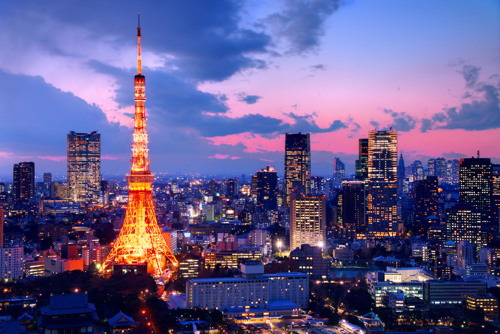

In [6]:
init_img = Image.open(init_img_path).convert("RGB")
init_img.thumbnail((500, 500))
init_img

In [ ]:
%%script false --no-raise-error
!pip install --upgrade pillow


In [2]:
used_model='/content/drive/MyDrive/StableDifussion/models/Lora/ydenV3Trainfix_ydenT.safetensors'
#steps=100
#seed=1
prompt='best quality, masterpiece,a girl,animation,dacing on the roof'
negative_prompt='bad hands, bad quality'
images_per_prompt=4

outdir='/content/drive/MyDrive/output_imgs/'

In [17]:
# https://github.com/kohya-ss/sd-scripts/blob/main/gen_img_diffusers.py
# https://github.com/kohya-ss/sd-scripts/blob/0cfcb5a49cf813547d728101cc05edf1a9b7d06c/docs/gen_img_README-ja.md?plain=1#L228


#--ckpt '{pretrained_model_name_or_path}
'''
  --network_module networks.lora \
  --network_weights  '{used_model}' \
  --network_mul 0.8 \
  '''

!python /content/drive/MyDrive/StableDifussion/sd-scripts/gen_img_diffusers.py \
  --ckpt '/content/drive/MyDrive/StableDifussion/models/Lora/ydenV3Trainfix_ydenT.safetensors' \
  --n_iter 1 \
  --scale 7.5 \
  --steps 50 \
  --outdir  '/content/drive/MyDrive/output_imgs/' \
  --prompt 'best quality, masterpiece,a girl,red dress' \
  --xformers \
  --W 1024 \
  --H 1024 \
  --seed  100 \
  --sampler k_euler_a \
  --max_embeddings_multiples 3 \
  --clip_skip 1 \
  --batch_size 1 \
  --images_per_prompt 1 \
  --image_path '/content/drive/MyDrive/datasets/imgs/others/tokyo_tower-1.jpg' \
  --strength 0.75 \
  --mask_path '/content/drive/MyDrive/datasets/imgs/others/tokyo_tower-1-mask.png' \
  #--control_net_models '/content/drive/MyDrive/sd/stable-diffusion-webui/models/ControlNet/control_sd15_canny.pth' \
  #--control_net_weights 1.0  \
  #--guide_image_path '/content/drive/MyDrive/datasets/imgs/others/cloud-1-guide.png' \
  #--control_net_ratios 1.0 --interactive \
  #--bf16

2023-07-20 13:09:31.511068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 13:09:32.332377: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-20 13:09:33.905188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-07-20 13:09:33.905320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

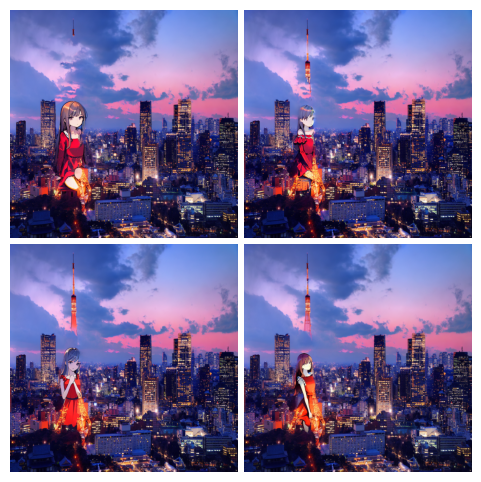

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def display_images(folder, n, width, cols):
    image_files = sorted((os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.png')),
                         key=os.path.getmtime, reverse=True)[:n]

    # 根据列数和图片总数计算行数
    rows = (n // cols) + (n % cols > 0)

    # 创建新的图像
    fig = plt.figure(figsize=(cols * width, rows * width))

    # 循环读取图片并显示
    for i, image_file in enumerate(image_files):
        img = mpimg.imread(image_file)
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.03)
    plt.show()

# 使用函数
display_images(outdir, n=images_per_prompt, width=3, cols=2)
